[gsm프로젝트 코드0] 한글 폰트 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

가져올 데이터  
표면 데이터(Overview Data) : 순위, 이름, 개봉연도, 상영 시간, 등급, 평점  
세부 데이터(Detailed Data) : 감독, 작가, 주요 배우, 평가 수

[gsm프로젝트 코드1] Overview Data 크롤링하기

크롤링 403 에러 방지 참고 링크  
https://www.reddit.com/r/learnpython/comments/14g2o3t/web_scraping_from_imdb_shows_forbidden_error_now/  

강의 자료 : Chapter5 웹크롤링활용

In [2]:
import requests
import bs4
import pandas as pd

def gsm_getOverviewData(IMDbUrl) :
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
  webPage = requests.get(IMDb_url, headers=headers)
  bsObject = bs4.BeautifulSoup(webPage.text, 'html.parser')

  tags = bsObject.findAll('li', {'class' : 'ipc-metadata-list-summary-item sc-4929eaf6-0 DLYcv cli-parent'})

  data = []
  for tag in tags :
    movie_r_n = tag.find('h3', {'class' : 'ipc-title__text'}).text.split('. ')
    movie_rank = movie_r_n[0]
    movie_name = movie_r_n[1]
    movie_y_t_a = tag.findAll('span', {'class' : 'sc-300a8231-7 eaXxft cli-title-metadata-item'})
    movie_year = movie_y_t_a[0].text
    movie_time = movie_y_t_a[1].text
    movie_age = movie_y_t_a[2].text
    movie_rating = tag.find('span', {'class' : 'ipc-rating-star--rating'}).text
    movie_link = 'https://www.imdb.com'+tag.find('a')['href']
    data.append([movie_rank, movie_name, movie_year, movie_time, movie_age, movie_rating, movie_link])

  df = pd.DataFrame(data, columns=['Rank', 'Name', 'Year', 'Time', 'Age', 'Rating', 'Link'])

  return df

IMDb_url = "https://www.imdb.com/chart/top/"

gsm_OverviewData = gsm_getOverviewData(IMDb_url)
gsm_OverviewData

,Rank,Name,Year,Time,Age,Rating,Link
0,1,The Shawshank Redemption,1994,2h 22m,R,9.3,https://www.imdb.com/title/tt0111161/?ref_=cht...
1,2,The Godfather,1972,2h 55m,R,9.2,https://www.imdb.com/title/tt0068646/?ref_=cht...
2,3,The Dark Knight,2008,2h 32m,PG-13,9.0,https://www.imdb.com/title/tt0468569/?ref_=cht...
3,4,The Godfather Part II,1974,3h 22m,R,9.0,https://www.imdb.com/title/tt0071562/?ref_=cht...
4,5,12 Angry Men,1957,1h 36m,Approved,9.0,https://www.imdb.com/title/tt0050083/?ref_=cht...
5,6,The Lord of the Rings: The Return of the King,2003,3h 21m,PG-13,9.0,https://www.imdb.com/title/tt0167260/?ref_=cht...
6,7,Schindler's List,1993,3h 15m,R,9.0,https://www.imdb.com/title/tt0108052/?ref_=cht...
7,8,Pulp Fiction,1994,2h 34m,R,8.9,https://www.imdb.com/title/tt0110912/?ref_=cht...
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58m,PG-13,8.9,https://www.imdb.com/title/tt0120737/?ref_=cht...
9,10,"The Good, the Bad and the Ugly",1966,2h 58m,R,8.8,https://www.imdb.com/title/tt0060196/?ref_=cht...


[gsm프로젝트 코드2] Detailed Data 크롤링하기

concat 함수 관련 링크  
https://docs.kanaries.net/ko/topics/Python/append-dataframe-pandas

크롤링 속도 조절 관련 링크  
https://ssongblog.tistory.com/119

In [3]:
import time
import numpy as np

def gsm_getDetailedData(Detailed_IMDb_url) :
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
  webPage = requests.get(Detailed_IMDb_url, headers=headers)
  if webPage.status_code == requests.codes.ok:
    print(f'{i}회차 크롤링 성공')
  else:
    print(f'{i}회차 크롤링 실패')

  bsObject = bs4.BeautifulSoup(webPage.text, 'html.parser')

  data = []
  webPage = bsObject.find('div', {'class' : 'sc-70a366cc-2 bscNnP'})
  li_tag = webPage.findAll('li', {'class' : 'ipc-metadata-list__item'})
  movie_Director = li_tag[0].find('div', {'class' : 'ipc-metadata-list-item__content-container'}).text
  movie_Writers = []
  Writers = li_tag[1].findAll('a', {'class' : 'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'})
  for Writer in Writers :
    movie_Writers.append(Writer.text)
  movie_Stars = []
  Stars = li_tag[2].findAll('a', {'class' : 'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'})
  for Star in Stars :
    movie_Stars.append(Star.text)
  movie_Reviews = bsObject.find('div', {'class' : 'sc-d541859f-3 dwhNqC'}).text
  data.append([Detailed_IMDb_url, movie_Director, movie_Writers, movie_Stars, movie_Reviews])

  df = pd.DataFrame(data, columns=['Link', 'Director', 'Writers', 'Stars', 'Reviews'])

  return df

gsm_DetailedData = pd.DataFrame(columns=['Link', 'Director', 'Writers', 'Stars', 'Reviews'])
i = 0
for link in gsm_OverviewData['Link'] :
  i += 1
  data = gsm_getDetailedData(link)
  gsm_DetailedData = pd.concat([gsm_DetailedData, data], ignore_index=True)
  seed = np.random.randint(100)
  np.random.seed(seed)
  time_sleep = np.random.randint(5)
  time.sleep(time_sleep)

gsm_DetailedData

1회차 크롤링 성공
2회차 크롤링 성공
3회차 크롤링 성공
4회차 크롤링 성공
5회차 크롤링 성공
6회차 크롤링 성공
7회차 크롤링 성공
8회차 크롤링 성공
9회차 크롤링 성공
10회차 크롤링 성공
11회차 크롤링 성공
12회차 크롤링 성공
13회차 크롤링 성공
14회차 크롤링 성공
15회차 크롤링 성공
16회차 크롤링 성공
17회차 크롤링 성공
18회차 크롤링 성공
19회차 크롤링 성공
20회차 크롤링 성공
21회차 크롤링 성공
22회차 크롤링 성공
23회차 크롤링 성공
24회차 크롤링 성공
25회차 크롤링 성공


,Link,Director,Writers,Stars,Reviews
0,https://www.imdb.com/title/tt0111161/?ref_=cht...,Frank Darabont,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton]",3M
1,https://www.imdb.com/title/tt0068646/?ref_=cht...,Francis Ford Coppola,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]",2.1M
2,https://www.imdb.com/title/tt0468569/?ref_=cht...,Christopher Nolan,"[Jonathan Nolan, Christopher Nolan, David S. G...","[Christian Bale, Heath Ledger, Aaron Eckhart]",3M
3,https://www.imdb.com/title/tt0071562/?ref_=cht...,Francis Ford Coppola,"[Francis Ford Coppola, Mario Puzo]","[Al Pacino, Robert De Niro, Robert Duvall]",1.4M
4,https://www.imdb.com/title/tt0050083/?ref_=cht...,Sidney Lumet,[Reginald Rose],"[Henry Fonda, Lee J. Cobb, Martin Balsam]",897K
5,https://www.imdb.com/title/tt0167260/?ref_=cht...,Peter Jackson,"[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]","[Elijah Wood, Viggo Mortensen, Ian McKellen]",2M
6,https://www.imdb.com/title/tt0108052/?ref_=cht...,Steven Spielberg,"[Thomas Keneally, Steven Zaillian]","[Liam Neeson, Ralph Fiennes, Ben Kingsley]",1.5M
7,https://www.imdb.com/title/tt0110912/?ref_=cht...,Quentin Tarantino,"[Quentin Tarantino, Roger Avary]","[John Travolta, Uma Thurman, Samuel L. Jackson]",2.3M
8,https://www.imdb.com/title/tt0120737/?ref_=cht...,Peter Jackson,"[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]","[Elijah Wood, Ian McKellen, Orlando Bloom]",2.1M
9,https://www.imdb.com/title/tt0060196/?ref_=cht...,Sergio Leone,"[Luciano Vincenzoni, Sergio Leone, Agenore Inc...","[Clint Eastwood, Eli Wallach, Lee Van Cleef]",834K


[gsm프로젝트 코드3] 표면 데이터(Overview Data)와 세부 데이터(Detailed Data)를 전체 데이터(Total Data)로 합치기

데이터프레임 병합 방법 참고 링크  
https://stackoverflow.com/questions/53645882/pandas-merging-101

In [4]:
gsm_totalData = pd.merge(gsm_OverviewData, gsm_DetailedData, on='Link', how='inner')
gsm_totalData

,Rank,Name,Year,Time,Age,Rating,Link,Director,Writers,Stars,Reviews
0,1,The Shawshank Redemption,1994,2h 22m,R,9.3,https://www.imdb.com/title/tt0111161/?ref_=cht...,Frank Darabont,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton]",3M
1,2,The Godfather,1972,2h 55m,R,9.2,https://www.imdb.com/title/tt0068646/?ref_=cht...,Francis Ford Coppola,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]",2.1M
2,3,The Dark Knight,2008,2h 32m,PG-13,9.0,https://www.imdb.com/title/tt0468569/?ref_=cht...,Christopher Nolan,"[Jonathan Nolan, Christopher Nolan, David S. G...","[Christian Bale, Heath Ledger, Aaron Eckhart]",3M
3,4,The Godfather Part II,1974,3h 22m,R,9.0,https://www.imdb.com/title/tt0071562/?ref_=cht...,Francis Ford Coppola,"[Francis Ford Coppola, Mario Puzo]","[Al Pacino, Robert De Niro, Robert Duvall]",1.4M
4,5,12 Angry Men,1957,1h 36m,Approved,9.0,https://www.imdb.com/title/tt0050083/?ref_=cht...,Sidney Lumet,[Reginald Rose],"[Henry Fonda, Lee J. Cobb, Martin Balsam]",897K
5,6,The Lord of the Rings: The Return of the King,2003,3h 21m,PG-13,9.0,https://www.imdb.com/title/tt0167260/?ref_=cht...,Peter Jackson,"[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]","[Elijah Wood, Viggo Mortensen, Ian McKellen]",2M
6,7,Schindler's List,1993,3h 15m,R,9.0,https://www.imdb.com/title/tt0108052/?ref_=cht...,Steven Spielberg,"[Thomas Keneally, Steven Zaillian]","[Liam Neeson, Ralph Fiennes, Ben Kingsley]",1.5M
7,8,Pulp Fiction,1994,2h 34m,R,8.9,https://www.imdb.com/title/tt0110912/?ref_=cht...,Quentin Tarantino,"[Quentin Tarantino, Roger Avary]","[John Travolta, Uma Thurman, Samuel L. Jackson]",2.3M
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58m,PG-13,8.9,https://www.imdb.com/title/tt0120737/?ref_=cht...,Peter Jackson,"[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]","[Elijah Wood, Ian McKellen, Orlando Bloom]",2.1M
9,10,"The Good, the Bad and the Ugly",1966,2h 58m,R,8.8,https://www.imdb.com/title/tt0060196/?ref_=cht...,Sergio Leone,"[Luciano Vincenzoni, Sergio Leone, Agenore Inc...","[Clint Eastwood, Eli Wallach, Lee Van Cleef]",834K


[gsm프로젝트 코드4] 데이터 정제하기 : 결측값 처리, 이상치 처리, 중복 데이터 제거

강의 자료 : Chapter8 데이터 전처리

In [5]:
# 결측값 확인
gsm_totalData.isnull().sum()

#  Rating 값이 10을 초과하는 데이터를 제거
gsm_totalData['Rating'] = gsm_totalData['Rating'].astype(float)
gsm_totalData = gsm_totalData[gsm_totalData['Rating'] <= 10]

# 중복 데이터 제거
gsm_totalData = gsm_totalData.drop_duplicates(subset=['Link'])

[gsm프로젝트 코드5] 데이터 정제하기 : 시간 변환, 리뷰수 변환

In [6]:
def convert_time_to_minutes(time_str):
  hours = 0
  minutes = 0

  if 'h' in time_str:
    hours = int(time_str.split('h')[0].strip())
  if 'm' in time_str:
    minutes = int(time_str.split('m')[0].split()[-1].strip())

  total_minutes = hours * 60 + minutes
  return total_minutes

def convert_reviews_to_number(review_str):
  review_str = review_str.strip()
  if 'M' in review_str:
    return int(float(review_str.replace('M', '').strip())) * 1000000
  elif 'K' in review_str:
    return int(float(review_str.replace('K', '').strip())) * 1000
  else:
    return int(float(review_str))

gsm_totalData['Time'] = gsm_totalData['Time'].apply(convert_time_to_minutes)
gsm_totalData['Reviews'] = gsm_totalData['Reviews'].apply(convert_reviews_to_number)

gsm_totalData

,Rank,Name,Year,Time,Age,Rating,Link,Director,Writers,Stars,Reviews
0,1,The Shawshank Redemption,1994,142,R,9.3,https://www.imdb.com/title/tt0111161/?ref_=cht...,Frank Darabont,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton]",3000000
1,2,The Godfather,1972,175,R,9.2,https://www.imdb.com/title/tt0068646/?ref_=cht...,Francis Ford Coppola,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]",2000000
2,3,The Dark Knight,2008,152,PG-13,9.0,https://www.imdb.com/title/tt0468569/?ref_=cht...,Christopher Nolan,"[Jonathan Nolan, Christopher Nolan, David S. G...","[Christian Bale, Heath Ledger, Aaron Eckhart]",3000000
3,4,The Godfather Part II,1974,202,R,9.0,https://www.imdb.com/title/tt0071562/?ref_=cht...,Francis Ford Coppola,"[Francis Ford Coppola, Mario Puzo]","[Al Pacino, Robert De Niro, Robert Duvall]",1000000
4,5,12 Angry Men,1957,96,Approved,9.0,https://www.imdb.com/title/tt0050083/?ref_=cht...,Sidney Lumet,[Reginald Rose],"[Henry Fonda, Lee J. Cobb, Martin Balsam]",897000
5,6,The Lord of the Rings: The Return of the King,2003,201,PG-13,9.0,https://www.imdb.com/title/tt0167260/?ref_=cht...,Peter Jackson,"[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]","[Elijah Wood, Viggo Mortensen, Ian McKellen]",2000000
6,7,Schindler's List,1993,195,R,9.0,https://www.imdb.com/title/tt0108052/?ref_=cht...,Steven Spielberg,"[Thomas Keneally, Steven Zaillian]","[Liam Neeson, Ralph Fiennes, Ben Kingsley]",1000000
7,8,Pulp Fiction,1994,154,R,8.9,https://www.imdb.com/title/tt0110912/?ref_=cht...,Quentin Tarantino,"[Quentin Tarantino, Roger Avary]","[John Travolta, Uma Thurman, Samuel L. Jackson]",2000000
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,178,PG-13,8.9,https://www.imdb.com/title/tt0120737/?ref_=cht...,Peter Jackson,"[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]","[Elijah Wood, Ian McKellen, Orlando Bloom]",2000000
9,10,"The Good, the Bad and the Ugly",1966,178,R,8.8,https://www.imdb.com/title/tt0060196/?ref_=cht...,Sergio Leone,"[Luciano Vincenzoni, Sergio Leone, Agenore Inc...","[Clint Eastwood, Eli Wallach, Lee Van Cleef]",834000


[gsm프로젝트 코드6] 병합 데이터 CSV 저장

In [26]:
gsm_totalData.to_csv('gsm_Crawling_Movie_Data.csv', index=False, encoding='utf-8')

[gsm프로젝트 코드7] 정규화 하기

In [7]:
gsm_totalData_nomalized = gsm_totalData[['Rating', 'Time', 'Reviews']]
gsm_totalData_nomalized['Rating'] =  (gsm_totalData['Rating'] - gsm_totalData['Rating'].min( )) / (gsm_totalData['Rating'].max( ) - gsm_totalData['Rating'].min( ))
gsm_totalData_nomalized['Time'] =  (gsm_totalData['Time'] - gsm_totalData['Time'].min( )) / (gsm_totalData['Time'].max( ) - gsm_totalData['Time'].min( ))
gsm_totalData_nomalized['Reviews'] =  (gsm_totalData['Reviews'] - gsm_totalData['Reviews'].min( )) / (gsm_totalData['Reviews'].max( ) - gsm_totalData['Reviews'].min( ))

gsm_totalData_nomalized.head()

<ipython-input-7-17d9c6127717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsm_totalData_nomalized['Rating'] =  (gsm_totalData['Rating'] - gsm_totalData['Rating'].min( )) / (gsm_totalData['Rating'].max( ) - gsm_totalData['Rating'].min( ))
<ipython-input-7-17d9c6127717>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsm_totalData_nomalized['Time'] =  (gsm_totalData['Time'] - gsm_totalData['Time'].min( )) / (gsm_totalData['Time'].max( ) - gsm_totalData['Time'].min( ))
<ipython-input-7-17d9c6127717>:4: 

,Rating,Time,Reviews
0,1.000000,0.414414,1.000000
1,0.857143,0.711712,0.618757
2,0.571429,0.504505,1.000000
3,0.571429,0.954955,0.237514
4,0.571429,0.000000,0.198246


[gsm프로젝트 코드8] 상관관계 분석 : 피어슨, 스피어만, 켄달

강의 자료 : Chatper9 상관관계 분석

In [8]:
coef_p = gsm_totalData_nomalized.corr(method='pearson')
print(coef_p)

           Rating      Time   Reviews
Rating   1.000000  0.252818  0.608871
Time     0.252818  1.000000  0.008477
Reviews  0.608871  0.008477  1.000000


In [9]:
coef_s = gsm_totalData_nomalized.corr(method='spearman')
print(coef_s)

           Rating      Time   Reviews
Rating   1.000000  0.378493  0.558751
Time     0.378493  1.000000  0.115773
Reviews  0.558751  0.115773  1.000000


In [10]:
coef_k = gsm_totalData_nomalized.corr(method='kendall')
print(coef_k)

           Rating      Time   Reviews
Rating   1.000000  0.324584  0.478926
Time     0.324584  1.000000  0.081014
Reviews  0.478926  0.081014  1.000000


[gsm프로젝트 코드9] PCA 주성분 분석

강의 자료 : Chatper11 주성분분석

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

gsm_pca = PCA(n_components=2)
gsm_pca.fit(gsm_totalData_nomalized)
gsm_pca_data = gsm_pca.transform(gsm_totalData_nomalized)

gsm_explzined_variance = gsm_pca.explained_variance_ratio_
print(f"제 1주성분의 설명력 : {gsm_explzined_variance[0]:.2%}")
print(f"제 2주성분의 설명력 : {gsm_explzined_variance[1]:.2%}")

제 1주성분의 설명력 : 56.90%
제 2주성분의 설명력 : 31.35%


[gsm프로젝트 코드10] 연도별 개봉 영화를 시계열 분석하여 다음 연도 영화의 rating 예측

강의 자료 : Chapter12 시계열 분석

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

gsm_timeSeries = gsm_totalData[['Year', 'Rating', 'Reviews']]
gsm_timeSeries = gsm_timeSeries.set_index('Year', inplace=False).sort_index()
gsm_timeSeries

,Rating,Reviews
Year,,
1946,8.6,512000
1954,8.6,377000
1957,9.0,897000
1966,8.8,834000
1972,9.2,2000000
1974,9.0,1000000
1975,8.7,1000000
1980,8.7,1000000
1990,8.7,1000000


[gsm프로젝트 코드11] Rating 예측과 Reviews 예측

In [13]:
gsm_model_Rating = ARIMA(gsm_timeSeries['Rating'], order=(1, 1, 1))
gsm_model_fit_Rating = gsm_model_Rating.fit()
gsm_predict_Rating = gsm_model_fit_Rating.forecast(steps=1)
gsm_predict_Rating

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,0
25,8.775781


In [14]:
gsm_model_Reviews = ARIMA(gsm_timeSeries['Reviews'], order=(1, 1, 1))
gsm_model_fit_Reviews = gsm_model_Reviews.fit()
gsm_predict_Reviews = gsm_model_fit_Reviews.forecast(steps=1)
gsm_predict_Reviews

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

,0
25,1.928869e+06


[gsm프로젝트 코드12] 예측값 시각화

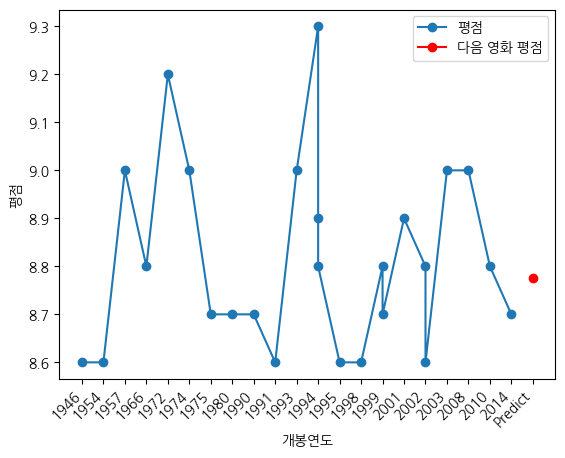

In [23]:
plt_Rating = plt
plt_Rating.rc('font', family='NanumGothic')

plt_Rating.plot(gsm_timeSeries.index, gsm_timeSeries["Rating"], label="평점", marker='o')
plt_Rating.plot('Predict', gsm_predict_Rating, label="다음 영화 평점", marker='o', color='red')
plt_Rating.xlabel("개봉연도")
plt_Rating.ylabel("평점")

plt_Rating.xticks(rotation=45, ha='right')

plt_Rating.legend()
plt_Rating.show()

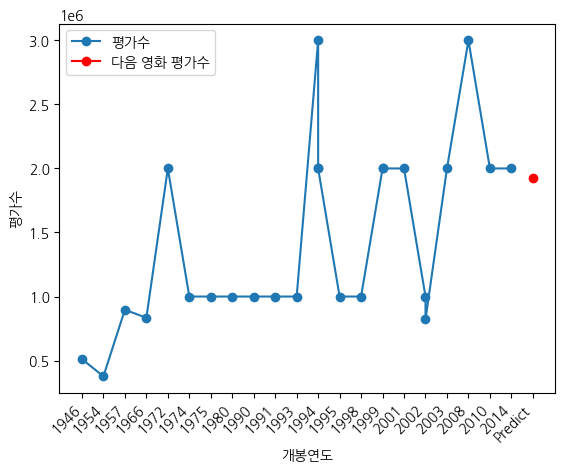

In [25]:
plt_Reviews = plt
plt_Reviews.rc('font', family='NanumGothic')

plt_Reviews.plot(gsm_timeSeries.index, gsm_timeSeries["Reviews"], label="평가수", marker='o')
plt_Reviews.plot('Predict', gsm_predict_Reviews, label="다음 영화 평가수", marker='o', color='red')
plt_Reviews.xlabel("개봉연도")
plt_Reviews.ylabel("평가수")

plt_Reviews.xticks(rotation=45, ha='right')

plt_Reviews.legend()
plt_Reviews.show()